Here I want to try magnetic triangulation using scalar values: either magnetic field strength or a particular component. The result will still be a vector.

In [24]:
from tensorflow import keras
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [25]:
# Load datasets

# For training
X_train = np.load('data/X_train.npy')
Y_train = np.load('data/Y_train.npy')

# For validation
X_val = np.load('data/X_val.npy')
Y_val = np.load('data/Y_val.npy')

X_test = np.load('data/X_test.npy')
Y_test = np.load('data/Y_test.npy')
# Use average field as a baseline model
Y_base = X_test.mean(axis=1)

In [28]:
# Callbacks
early_stopping_cb = keras.callbacks.EarlyStopping(patience=500, monitor='val_loss',restore_best_weights=True) # Stop training if validation loss is not improving
learning_rate_cb = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=300) # Reduce learning rate is the validation loss is not improving

# Using only x-component

In [16]:
model_x = model
# Train
history = model_x.fit(X_train[:,:,2], Y_train, epochs=5000, validation_data=(X_val[:,:,2], Y_val), batch_size=16, callbacks=[early_stopping_cb, learning_rate_cb], verbose=True)

Epoch 1/5000
16/16 [==============================] - 0s 6ms/step - loss: 15.7077 - mae: 15.7077 - val_loss: 9.2891 - val_mae: 9.2891 - lr: 0.0010
Epoch 2/5000
16/16 [==============================] - 0s 2ms/step - loss: 7.9114 - mae: 7.9114 - val_loss: 7.0527 - val_mae: 7.0527 - lr: 0.0010
Epoch 3/5000
16/16 [==============================] - 0s 2ms/step - loss: 5.9917 - mae: 5.9917 - val_loss: 5.5739 - val_mae: 5.5739 - lr: 0.0010
Epoch 4/5000
16/16 [==============================] - 0s 2ms/step - loss: 4.2503 - mae: 4.2503 - val_loss: 3.6175 - val_mae: 3.6175 - lr: 0.0010
Epoch 5/5000
16/16 [==============================] - 0s 2ms/step - loss: 2.6136 - mae: 2.6136 - val_loss: 2.1045 - val_mae: 2.1045 - lr: 0.0010
Epoch 6/5000
16/16 [==============================] - 0s 2ms/step - loss: 1.7283 - mae: 1.7283 - val_loss: 1.3937 - val_mae: 1.3937 - lr: 0.0010
Epoch 7/5000
16/16 [==============================] - 0s 2ms/step - loss: 1.7763 - mae: 1.7763 - val_loss: 1.7529 - val_mae: 1.7

Text(0, 0.5, 'mae')

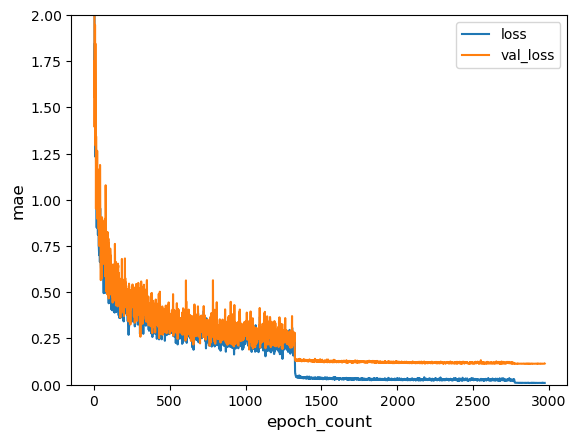

In [17]:
# Plot
h_cnn = history.history
history_df = pd.DataFrame(history.history)
ax= history_df.loc[:, ['loss', 'val_loss']].plot();
ax.set_ylim(0,2)
ax.set_xlabel(r'epoch_count',fontsize=12)
ax.set_ylabel(r'mae',fontsize=12)

In [18]:

# Apply model to predict the target field
Y_pred = model.predict(X_test[:,:,2])

8/8 [==============================] - 0s 1ms/step


In [19]:
# Network prediction
print('Network', np.abs(Y_test-Y_pred).max())

# Baseline prediction
print('Average', np.abs(Y_test-Y_base).max())

Network 1.0155333444253216
Average 127.6208408167237


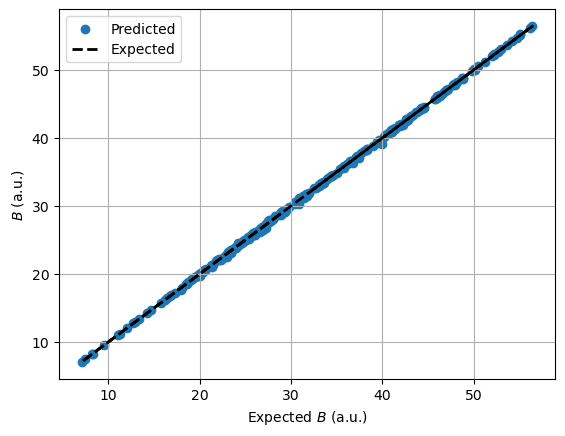

In [20]:
fig, ax = plt.subplots()
ax.scatter(np.sqrt((Y_test**2).sum(axis=1)), np.sqrt((Y_pred**2).sum(axis=1)), label = 'Predicted')
ax.plot(np.sqrt((Y_test**2).sum(axis=1)), np.sqrt((Y_test**2).sum(axis=1)), linewidth=2.0, ls='--', label = 'Expected', color = 'black')
ax.set_ylabel(r'$B$ (a.u.)')
ax.set_xlabel(r'Expected $B$ (a.u.)')
ax.legend(loc=0)
ax.grid()

# X values

In [34]:
# Initialize model
model2 = keras.models.Sequential([
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(32,activation='relu'),
    keras.layers.Dense(3)
])

# Compile model
model2.compile(loss="mae", optimizer = keras.optimizers.Adam(),metrics=["mae"])

In [35]:
# Train
history = model2.fit(X_train[:,:,0], Y_train, epochs=5000, validation_data=(X_val[:,:,0], Y_val), batch_size=16, callbacks=[early_stopping_cb, learning_rate_cb], verbose=True)

Epoch 1/5000
16/16 [==============================] - 0s 7ms/step - loss: 15.5407 - mae: 15.5407 - val_loss: 14.9577 - val_mae: 14.9577 - lr: 0.0010
Epoch 2/5000
16/16 [==============================] - 0s 2ms/step - loss: 15.0825 - mae: 15.0825 - val_loss: 14.4907 - val_mae: 14.4907 - lr: 0.0010
Epoch 3/5000
16/16 [==============================] - 0s 2ms/step - loss: 14.5445 - mae: 14.5445 - val_loss: 13.8914 - val_mae: 13.8914 - lr: 0.0010
Epoch 4/5000
16/16 [==============================] - 0s 2ms/step - loss: 13.8629 - mae: 13.8629 - val_loss: 13.1367 - val_mae: 13.1367 - lr: 0.0010
Epoch 5/5000
16/16 [==============================] - 0s 2ms/step - loss: 13.0057 - mae: 13.0057 - val_loss: 12.2003 - val_mae: 12.2003 - lr: 0.0010
Epoch 6/5000
16/16 [==============================] - 0s 2ms/step - loss: 11.9771 - mae: 11.9771 - val_loss: 11.1379 - val_mae: 11.1379 - lr: 0.0010
Epoch 7/5000
16/16 [==============================] - 0s 2ms/step - loss: 10.7870 - mae: 10.7870 - val_los

Text(0, 0.5, 'mae')

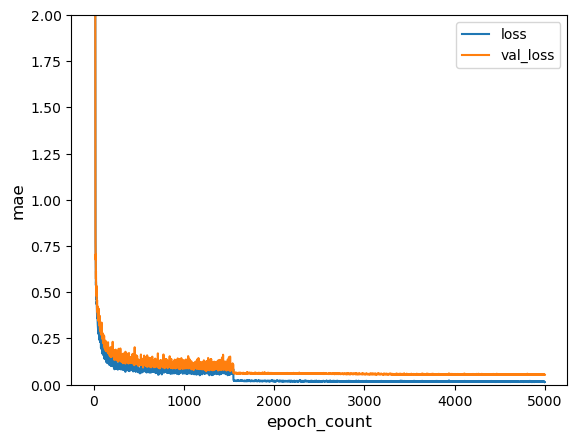

In [36]:
# Plot
h_cnn = history.history
history_df = pd.DataFrame(history.history)
ax= history_df.loc[:, ['loss', 'val_loss']].plot();
ax.set_ylim(0,2)
ax.set_xlabel(r'epoch_count',fontsize=12)
ax.set_ylabel(r'mae',fontsize=12)

8/8 [==============================] - 0s 724us/step


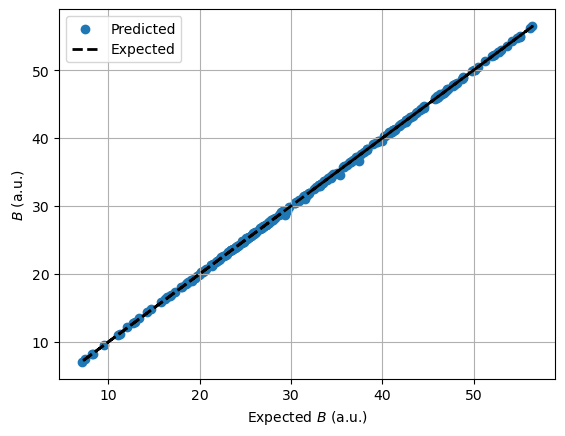

In [41]:
X_test = np.load('data/X_test.npy')
Y_test = np.load('data/Y_test.npy')

# Apply model to predict the target field
Y_pred = model2.predict(X_test[:,:,0])

# Use average field as a baseline model
Y_base = X_test.mean(axis=1)

fig, ax = plt.subplots()
ax.scatter(np.sqrt((Y_test**2).sum(axis=1)), np.sqrt((Y_pred**2).sum(axis=1)), label = 'Predicted')
ax.plot(np.sqrt((Y_test**2).sum(axis=1)), np.sqrt((Y_test**2).sum(axis=1)), linewidth=2.0, ls='--', label = 'Expected', color = 'black')
ax.set_ylabel(r'$B$ (a.u.)')
ax.set_xlabel(r'Expected $B$ (a.u.)')
ax.legend(loc=0)
ax.grid()

# Mixed configuration: XYYZ-ZXXY
Here, different sensors measure different components. I use XYYZ-ZXXY pattern, i.g., 1st measures X, 2d measures Y, 3d measures Y, etc.

In [94]:
# Create the training data with appropriate shuffle
shape = np.shape(X_train[:,:,0])
X_train_mixed, X_val_mixed, X_test_mixed = np.zeros(shape), np.zeros(shape), np.zeros(shape)

mask = [0, 1, 1, 2, 2, 0, 0, 1]

for i in range(len(mask)):
    X_train_mixed[:,i] = X_train[:,i,mask[i]]
    X_val_mixed[:,i]  = X_val[:,i,mask[i]]
    X_test_mixed[:,i]  = X_test[:,i,mask[i]]


In [95]:
model_m = keras.models.Sequential([
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(32,activation='relu'),
    keras.layers.Dense(3)
])
# Compile model
model_m.compile(loss="mae", optimizer = keras.optimizers.Adam(),metrics=["mae"])

In [96]:
# Train
history = model_m.fit(X_train_mixed, Y_train, epochs=5000, validation_data=(X_val_mixed, Y_val), batch_size=16, callbacks=[early_stopping_cb, learning_rate_cb], verbose=True)

Epoch 1/5000
16/16 [==============================] - 0s 7ms/step - loss: 14.0973 - mae: 14.0973 - val_loss: 12.5061 - val_mae: 12.5061 - lr: 0.0010
Epoch 2/5000
16/16 [==============================] - 0s 2ms/step - loss: 11.9271 - mae: 11.9271 - val_loss: 10.6994 - val_mae: 10.6994 - lr: 0.0010
Epoch 3/5000
16/16 [==============================] - 0s 2ms/step - loss: 10.0685 - mae: 10.0685 - val_loss: 8.5044 - val_mae: 8.5044 - lr: 0.0010
Epoch 4/5000
16/16 [==============================] - 0s 2ms/step - loss: 8.1510 - mae: 8.1510 - val_loss: 7.2193 - val_mae: 7.2193 - lr: 0.0010
Epoch 5/5000
16/16 [==============================] - 0s 2ms/step - loss: 6.8676 - mae: 6.8676 - val_loss: 6.0062 - val_mae: 6.0062 - lr: 0.0010
Epoch 6/5000
16/16 [==============================] - 0s 2ms/step - loss: 5.7923 - mae: 5.7923 - val_loss: 4.5994 - val_mae: 4.5994 - lr: 0.0010
Epoch 7/5000
16/16 [==============================] - 0s 2ms/step - loss: 4.2560 - mae: 4.2560 - val_loss: 3.3622 - val_

Text(0, 0.5, 'mae')

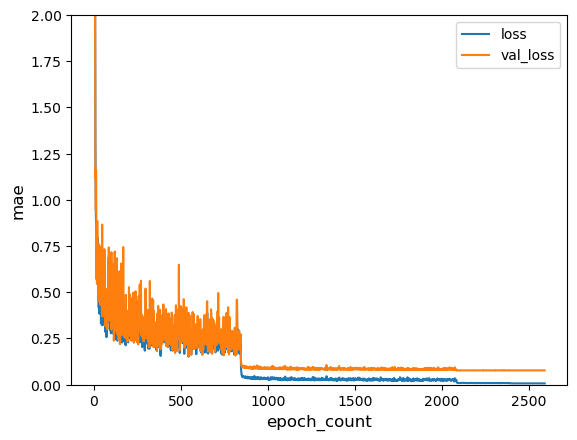

In [97]:
# Plot
h_cnn = history.history
history_df = pd.DataFrame(history.history)
ax= history_df.loc[:, ['loss', 'val_loss']].plot();
ax.set_ylim(0,2)
ax.set_xlabel(r'epoch_count',fontsize=12)
ax.set_ylabel(r'mae',fontsize=12)

8/8 [==============================] - 0s 958us/step


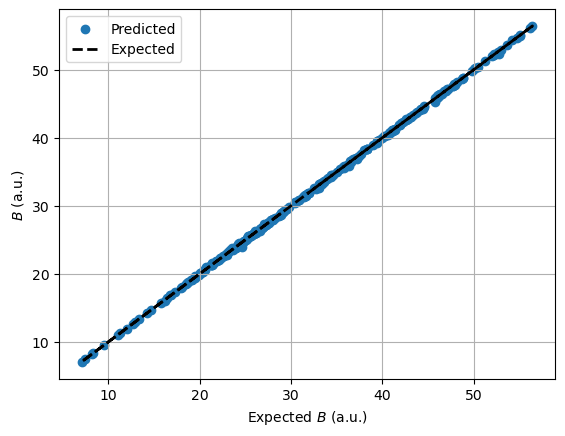

In [98]:
# Apply model to predict the target field
Y_pred = model_m.predict(X_test_mixed)

fig, ax = plt.subplots()
ax.scatter(np.sqrt((Y_test**2).sum(axis=1)), np.sqrt((Y_pred**2).sum(axis=1)), label = 'Predicted')
ax.plot(np.sqrt((Y_test**2).sum(axis=1)), np.sqrt((Y_test**2).sum(axis=1)), linewidth=2.0, ls='--', label = 'Expected', color = 'black')
ax.set_ylabel(r'$B$ (a.u.)')
ax.set_xlabel(r'Expected $B$ (a.u.)')
ax.legend(loc=0)
ax.grid()